In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import StandardScaler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
# %pip install lightgbm
from imblearn.under_sampling import ClusterCentroids, TomekLinks
from imblearn.over_sampling import RandomOverSampler

In [57]:
random_state=123
best_models = {}

In [58]:
# Read in the data
df = pd.read_csv('../Data/Final_skin_cancer.csv')

df

,smoke,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,diagnostic
0,False,55,False,0,True,True,True,True,1
1,False,79,False,1,True,False,False,False,1
2,False,52,False,0,False,True,True,True,1
3,False,74,True,0,False,False,False,False,1
4,False,58,True,0,True,True,True,True,1
...,...,...,...,...,...,...,...,...,...
1700,False,23,True,0,False,True,True,True,0
1701,False,27,False,0,False,False,True,True,0
1702,True,23,False,1,False,False,True,True,0
1703,False,23,True,0,False,False,True,False,0


In [59]:
df.duplicated().sum()

856

# New Section

In [60]:

def training(X_train, y_train):
    # Create a ET classifier with 5 neighbors
    ET = ExtraTreesClassifier()
    # Fit the classifier to the data
    ET.fit(X_train, y_train)
    return ET

In [61]:
def predict(ET, X_test ,y_test):
    # Predict the labels for the training data X
    y_pred = ET.predict(X_test)
    cr=classification_report(y_test, y_pred)
    print(cr)

In [62]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# def optimize_with_grid(X_train, y_train):
#     # Define a pipeline
#     # Note: Scaling might not be necessary for tree-based models, but included for consistency
#     pipe = Pipeline([
#         ('scaler', StandardScaler()),  # Optional for ExtraTrees
#         ('extra_trees', ExtraTreesClassifier(random_state=random_state))
#     ])

#     # Define the parameter grid to search
#     param_grid = {
#         'extra_trees__n_estimators': [100, 200, 300],  # Number of trees in the forest
#         'extra_trees__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#         'extra_trees__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#         'extra_trees__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#         'extra_trees__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
#     }

#     # Create the GridSearchCV object
#     extra_trees_cv = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)

#     # Perform the grid search on the provided data
#     extra_trees_cv.fit(X_train, y_train)

#     # Best parameters and best score
#     best_params = extra_trees_cv.best_params_
#     best_score = extra_trees_cv.best_score_
#     best_estimator = extra_trees_cv.best_estimator_
#     print("Best Parameters:", best_params)
#     print("Best Score:", best_score)

#     return best_estimator
# # Example usage
# # Ensure you have defined X_train, y_train, and optionally random_state before calling this function
# # best_extra_trees_model = optimize_with_grid_extra_trees(X_train, y_train, random_state=42)


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

def optimize_with_grid(X_train, y_train):
    # Define the ExtraTreesClassifier
    extra_trees = ExtraTreesClassifier(random_state=random_state)

    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
    }

    # Create the GridSearchCV object
    extra_trees_cv = GridSearchCV(extra_trees, param_grid, cv=5, verbose=1, n_jobs=-1)

    # Perform the grid search on the provided data
    extra_trees_cv.fit(X_train, y_train)

    # Best parameters and best score
    best_params = extra_trees_cv.best_params_
    best_score = extra_trees_cv.best_score_
    best_estimator = extra_trees_cv.best_estimator_
    print("Best Parameters:", best_params)
    print("Best Score:", best_score)

    return best_estimator

# Example usage
# Ensure you have defined X_train, y_train, and optionally random_state before calling this function
# best_extra_trees_model = optimize_with_grid(X_train, y_train, random_state=42)


<h1> ET on original data with optimization </h1>

In [63]:
# using function with no sampling
# First, split the data into features and target variable
X = df.drop(['diagnostic'], axis=1)
y = df['diagnostic']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


In [64]:
#check number of observations in each class in the set
print("Number of observations in each class in the training set:")
print(y_train.value_counts())

Number of observations in each class in the training set:
diagnostic
1    1192
0     172
Name: count, dtype: int64


In [65]:
ET1 = training(X_train, y_train)
y_pred = predict(ET1, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.98      0.98      0.98       302

    accuracy                           0.96       341
   macro avg       0.91      0.91      0.91       341
weighted avg       0.96      0.96      0.96       341



In [66]:
best_ET = optimize_with_grid(X_train, y_train)
prediction = predict(best_ET, X_test, y_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9376966171083818
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.98      0.97      0.98       302

    accuracy                           0.96       341
   macro avg       0.89      0.90      0.89       341
weighted avg       0.96      0.96      0.96       341




540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
412 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hneen/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hneen/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/hneen/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users/hneen/miniconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_par

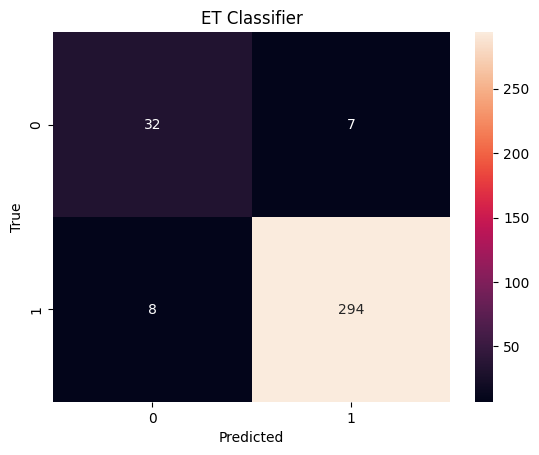

In [67]:
# plot the confusion matrix for the model
y_pred = best_ET.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ET Classifier')
plt.show()

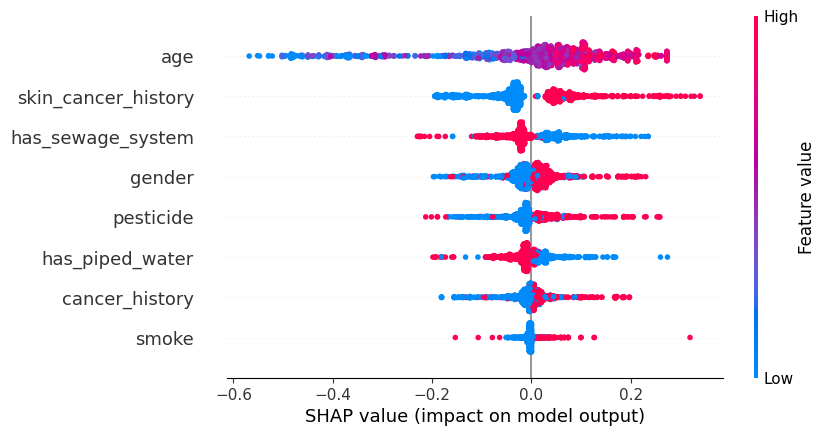

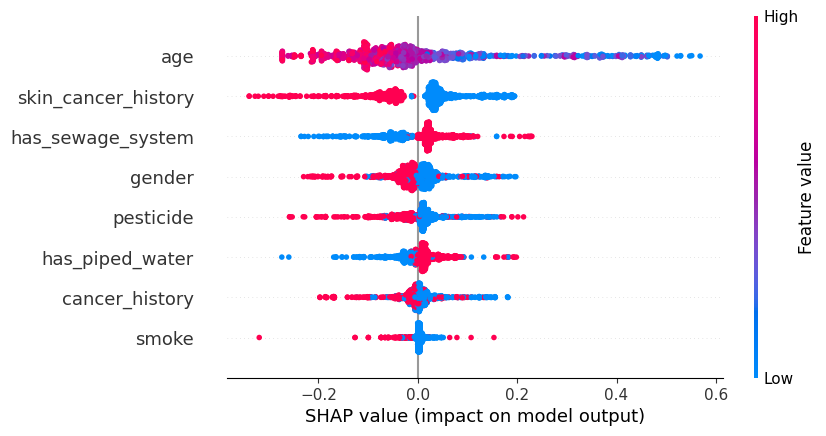

In [68]:
import shap

explainer = shap.Explainer(best_ET)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values[:,:,1])
shap.plots.beeswarm(shap_values[:,:,0])




In [113]:
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Has Skin Cancer', 'No Skin Cancer']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer1 = LimeTabularExplainer(X_train.values, feature_names =     
                                feature_names,
                                class_names = class_names, 
                                mode = 'classification')

# Select an instance to explain
instance_index = 99 # For example, explain the first instance in the test set
X_test_instance = X_test.values[instance_index]

# Generate an explanation for the selected instance
exp = explainer1.explain_instance(X_test_instance, best_ET.predict_proba, num_features=len(feature_names))

# Display the explanation
# This will display the contribution of each feature to the model's prediction for the instance
exp.show_in_notebook(show_table=True, show_all=False)

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names


In [114]:
# Select an instance to explain 14 21
instance_index = 21 # For example, explain the first instance in the test set
X_test_instance = X_test.values[instance_index]

# Generate an explanation for the selected instance
exp = explainer1.explain_instance(X_test_instance, best_ET.predict_proba, num_features=len(feature_names))

# Display the explanation
# This will display the contribution of each feature to the model's prediction for the instance
exp.show_in_notebook(show_table=True, show_all=False)

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
